In [1]:
import torch
from models.regression_model import RModel
import pandas as pd
import random
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

c:\Users\gonza\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('data/num_train_processed.csv')
train_df = df[:1168];
test_df = df[1168:]

In [3]:
train_df.iloc[:,-1]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1163    108959
1164    194000
1165    233170
1166    245350
1167    173000
Name: Saleprice, Length: 1168, dtype: int64

In [4]:
X = torch.tensor(train_df.iloc[:,1:-2].values,device=device,dtype=torch.float32)  
Y = torch.tensor(train_df.iloc[:,-1].values,device=device,dtype=torch.float32)
test_x = torch.tensor(test_df.iloc[:,1:-2].values,device=device,dtype=torch.float32)
test_y = torch.tensor(test_df.iloc[:,-1].values,device=device,dtype=torch.float32)

In [9]:
# Initialize The model
rmodel = RModel(X.shape[1])
rmodel.to(device)
# Prepare the network for training
epochs = 2200
batch_size = 20
# Initialize loss function
loss_fn = torch.nn.MSELoss()
# Initialize optimizer
optm = torch.optim.Adam(params=rmodel.parameters(),lr=1e-1)
# Divide tensors into batch sizes
train_x = X.split(batch_size);
train_y = Y.split(batch_size);

In [10]:

import copy
losses = []
accuracies = []
num_batches = 10
max_accuracy = 0
best_model = copy.deepcopy(rmodel.state_dict())
min_loss = -1
for epoch in range(epochs):
    rmodel.train()
    for i in range(num_batches):
        indx = random.randint(0,len(train_x)-1)
        x = train_x[indx]
        y = train_y[indx]
        output = rmodel.forward(x,x.size()[0])
        #print(y,output)
        loss = torch.sqrt(loss_fn.forward(output,y.reshape(y.size()[0],1)))
        optm.zero_grad()
        loss.backward()
        optm.step()
    with torch.no_grad():
        rmodel.eval()
        net_out = rmodel.forward(test_x,test_x.size()[0])
        loss = torch.sqrt(loss_fn.forward(net_out,test_y.reshape(test_y.size()[0],1)))
        if loss < min_loss or min_loss == -1:
            best_model = copy.deepcopy(rmodel.state_dict())
            min_loss = loss
        losses.append(loss.cpu())
        print(f'EPOCH: {epoch}, Loss: {loss}')

EPOCH: 0, Loss: 199598.765625
EPOCH: 1, Loss: 198902.078125
EPOCH: 2, Loss: 197464.140625
EPOCH: 3, Loss: 195234.625
EPOCH: 4, Loss: 191915.203125
EPOCH: 5, Loss: 187401.90625
EPOCH: 6, Loss: 181663.390625
EPOCH: 7, Loss: 174774.734375
EPOCH: 8, Loss: 166574.546875
EPOCH: 9, Loss: 157169.125
EPOCH: 10, Loss: 147648.421875
EPOCH: 11, Loss: 137864.015625
EPOCH: 12, Loss: 127841.7421875
EPOCH: 13, Loss: 118835.4609375
EPOCH: 14, Loss: 110947.3046875
EPOCH: 15, Loss: 104850.9609375
EPOCH: 16, Loss: 99632.2578125
EPOCH: 17, Loss: 96613.1953125
EPOCH: 18, Loss: 95193.5
EPOCH: 19, Loss: 94098.4765625
EPOCH: 20, Loss: 93146.21875
EPOCH: 21, Loss: 91881.6796875
EPOCH: 22, Loss: 90458.8046875
EPOCH: 23, Loss: 89009.875
EPOCH: 24, Loss: 87365.921875
EPOCH: 25, Loss: 86163.328125
EPOCH: 26, Loss: 84846.4140625
EPOCH: 27, Loss: 83446.9140625
EPOCH: 28, Loss: 82340.921875
EPOCH: 29, Loss: 81241.0703125
EPOCH: 30, Loss: 80069.1328125
EPOCH: 31, Loss: 78850.296875
EPOCH: 32, Loss: 77659.25
EPOCH: 33, 

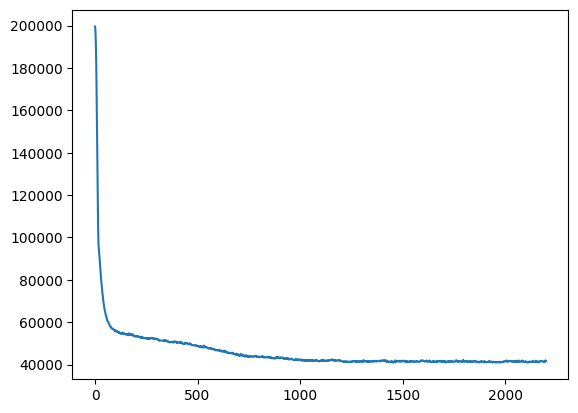

In [11]:
import matplotlib.pyplot as pyplot
pyplot.plot(list(range(epochs)),losses)

In [12]:
rmodel.load_state_dict(best_model)

<All keys matched successfully>

In [13]:
# Make the predictions of test and training data
df_test = pd.read_csv("data/test_processed.csv")
num_df_test = pd.read_csv("data/num_test_processed.csv")


In [14]:
num_df_test 

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,0.684614,0.363804,-0.750844,0.400629,-0.340828,-1.072517,-0.563123,0.063914,0.517359,...,1.185105,0.366553,-0.701387,-0.360615,-0.088796,1.818336,-0.057207,-0.092212,-0.038268,1.713318
1,1462,0.715606,0.897553,-0.054858,0.400629,-0.439544,-1.214492,0.047040,1.063349,-0.297587,...,-0.738265,2.347063,-0.178765,-0.360615,-0.088796,-0.301440,-0.057207,19.723675,-0.038268,1.713318
2,1463,0.498660,0.809368,-0.750844,-0.497247,0.843770,0.678509,-0.563123,0.773403,-0.297587,...,0.043967,0.930176,-0.207799,-0.360615,-0.088796,-0.301440,-0.057207,-0.092212,-1.140224,1.713318
3,1464,0.622629,0.032053,-0.054858,0.400629,0.876675,0.678509,-0.450130,0.358253,-0.297587,...,-0.011250,2.088735,-0.178765,-0.360615,-0.088796,-0.301440,-0.057207,-0.092212,-0.038268,1.713318
4,1465,-0.462102,-0.971475,1.337113,-0.497247,0.679242,0.394559,-0.563123,-0.386381,-0.297587,...,0.154400,-0.729382,0.489031,-0.360615,-0.088796,2.242291,-0.057207,-0.092212,-1.874861,1.713318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,-1.143933,-1.590785,-1.446829,1.298505,-0.044678,-0.646592,-0.563123,-0.964076,-0.297587,...,-2.173890,-0.729382,-0.701387,-0.360615,-0.088796,-0.301440,-0.057207,-0.092212,-0.038268,-1.359492
1455,2916,-1.143933,-1.599260,-1.446829,-0.497247,-0.044678,-0.646592,-0.563123,-0.410543,-0.297587,...,-0.857900,-0.729382,-0.352972,-0.360615,-0.088796,-0.301440,-0.057207,-0.092212,-0.772905,-1.359492
1456,2917,3.164000,2.054445,-0.750844,1.298505,-0.373733,0.583859,-0.563123,1.724514,-0.297587,...,0.476495,2.981139,-0.701387,-0.360615,-0.088796,-0.301440,-0.057207,-0.092212,1.063688,-1.359492
1457,2918,0.126752,0.125484,-0.750844,-0.497247,0.679242,0.394559,-0.563123,-0.223835,-0.297587,...,-2.173890,-0.103134,-0.236834,-0.360615,-0.088796,-0.301440,-0.057207,1.017478,0.329051,-1.359492


In [21]:
num_df_x = torch.tensor(num_df_test.iloc[:,1:].values,device=device,dtype=torch.float32)
rmodel.eval()
predictions = rmodel.forward(num_df_x,num_df_x.size()[0]).cpu().detach()
df_test["NumPred"] = predictions

In [22]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,NumPred
0,1461,20,RH,80.0,11622,Pave,NO,Reg,Lvl,AllPub,...,0,NO,MnPrv,NO,0,6,2010,WD,Normal,119405.515625
1,1462,20,RL,81.0,14267,Pave,NO,IR1,Lvl,AllPub,...,0,NO,NO,Gar2,12500,6,2010,WD,Normal,163346.265625
2,1463,60,RL,74.0,13830,Pave,NO,IR1,Lvl,AllPub,...,0,NO,MnPrv,NO,0,3,2010,WD,Normal,190840.781250
3,1464,60,RL,78.0,9978,Pave,NO,IR1,Lvl,AllPub,...,0,NO,NO,NO,0,6,2010,WD,Normal,204806.078125
4,1465,120,RL,43.0,5005,Pave,NO,IR1,HLS,AllPub,...,0,NO,NO,NO,0,1,2010,WD,Normal,176631.890625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NO,Reg,Lvl,AllPub,...,0,NO,NO,NO,0,6,2006,WD,Normal,106364.320312
1455,2916,160,RM,21.0,1894,Pave,NO,Reg,Lvl,AllPub,...,0,NO,NO,NO,0,4,2006,WD,Abnorml,93830.710938
1456,2917,20,RL,160.0,20000,Pave,NO,Reg,Lvl,AllPub,...,0,NO,NO,NO,0,9,2006,WD,Abnorml,198141.171875
1457,2918,85,RL,62.0,10441,Pave,NO,Reg,Lvl,AllPub,...,0,NO,MnPrv,Shed,700,7,2006,WD,Normal,99047.414062


In [24]:
# Make the predictions of training data
df_train = pd.read_csv("data/train_processed.csv")
num_df_xt =torch.tensor(df.iloc[:,1:-2].values,device=device,dtype=torch.float32)  
rmodel.eval()
predictions = rmodel.forward(num_df_xt,num_df_xt.size()[0]).cpu().detach()
df_train["NumPred"] = predictions

In [26]:
# Save the csvs
df_test.to_csv('data/test_with_pred.csv',index=False)
df_train.to_csv('data/train_with_pred.csv'index=False)